## Simulating Magnetic Control of HOPG Microparticles in Aqueous Solution
**Date: 10/09/20**

**Author: Jaime Sabal**

### Introduction

Graphite is a very cheap material with many potential applications due to its useful electrical, magnetic, thermal and optical properties. For micrometer sized particles in a static aqueous solution, the generation of particle motion requires that large, dominant viscous drag forces are overcome. The preferred method of generating motion is through a magnetic field gradient acting on the particle. Since HOPG microparticles are diamagentic, they are attracted to magnetic field minima and can thus be made to follow minimum-field paths at a distance from the field source [1]. The microparticles that are being magnetically transported can thus be interpreted as being subject to a magnetic potential that can be expressed as follows (Eq. 3 in [1]):

$$ \mathsf{U}_m = -\frac{V{\mid B \mid}^{2}}{2\mu_0} \left[(\chi_{2,\parallel}-\chi_1) +(\chi_{2,\perp}-\chi_{2,\parallel})\cos^2\theta \right] \tag{1}$$

where $V$ is the microparticle volume, $\mid B \mid = B_0 - \nabla Bx$ is the field amplitude with $B_0 = 1.5 \mathsf{T}$ being the magnetic-field strength maximum at $x=0$ and $\nabla B$ being the field gradient in the x-direction (only axis in which there is a gradient in this example). Note that in this case we need a negative field gradient since HOPG is a diamagnetic particle and is attracted toward field minima. Moreover, $\mu_0$ is the permeability of free space, $\chi_1=-9.0*10^{-6}$ is the isotropic magnetic susceptibility of the fluid (water), and $\chi_{2,\parallel} = -8.2*10^{-5}$ and $\chi_{2,\perp} = -5.82*10^{-4}$ are the in-plane and out-of-plane components of the anisotropic magnetic susceptibility of the HOPG particle, and $\theta$ is the particle orientation with respect to the field. However, it is energetically favorable to orient the particle graphene planes parallel to the magnetic-field lines ($\theta = \pm 90^\circ$), allowing us to simplify Eq.1 to just: 

$$ \mathsf{U}_m = -\frac{V{\mid B \mid}^{2}}{2\mu_0} \left[\chi_{2,\parallel}-\chi_1 \right] \tag{2} $$

In the case of this simulation, we will use an ellipse with dimensions $5\mu m \mathsf{x} 5\mu m \mathsf{x} 1\mu m $ with a corresponding volume $\mathsf{V} = 2\pi abc$. In the two cells below we import the necessary python modules and define all the necessary constants. 

### Importing Necessary Modules

In [164]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Defining Necessary Constants

In [165]:
mu_0 = 4*np.pi*1e-07 #permeability of free space in m*kg*s^(-2)*A^(-2)
V = 2*np.pi*(5e-06)*(5e-06)*(1e-06) #volume of HOPG microparticle in m^3
B_0 = 1.5 #in T
grad_B = 2300 #in T/m
chi_water = -9e-06 #magnetic susceptibility of water
chi_parr = -8.2e-05 #in-plane magnetic susceptibility of HOPG
chi_perp = -5.82e-04 #out-of-plane magnetic susceptibility of HOPG
dc = 1e-05 #y-axis position of centre wire in meters
I_centre = 3 #current of centre wire in amperes

#brownian motion constants
kb = 1.38064852e-23 #Boltzmann constant (m^2*kg*s^(-2)*K^(-1))
T = 298 #absolute temperature (Kelvin, eq. to 25 deg Celsius)
a = 5e-06 #microparticle radius (meters)
eta = 8.9e-04 #fluid viscosity (Pa*s)
gamma = 6*np.pi*eta*a #particle friction coefficient (Pa*s*m)
D = (kb*T)/gamma #constant used in brownian motion calculation

### Using a Centre Wire to Guide our HOPG Particle

Now that we have imported the needed functions and defined the constants that will be used throughout the notebook, we can proceed to derive the equation of motion of our desired system. We can start by simulating the motion of the particle using a 2D wire guide, where the particle moves along an axis and is trapped along the other axes. This can be achieved through the combination of the magnetic field generated from a current flowing through an infinitely thin centre wire (along the x-axis) and a uniform bias field perpendicular to the wire (y-axis). This combination allows for there to be a line above and parallel to the wire where both fields cancel out and that serves as a guide for the particle. 

In this notebook, we will use a centre wire with a current $I_{c} = 3 \mathsf{A}$ that is $\mathsf{dc} = 10µm$ below the desired "height" (on z-axis) of the particle motion. The equation to calculate the field strength at a distance $r$ from the wire is [2]: 

$$ B_{wire} = \frac{\mu_0 I_c}{2\pi r} \tag{3} $$

In the cell below we create an array of values for the field created by the centre wire. 

In [166]:
#x, y, and z arrays
x_array = np.linspace(-1e-04, 1e-04, 500)
z_array = np.linspace(-1e-04, 1e-04, 500)

#calculate field components for x and z values
Bx = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(z+dc) for x,z in zip(x_array, z_array)]
By = 0
Bz = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(-x) for x,z in zip(x_array, z_array)]

#insert components into a single list
B_wire = [Bx, By, Bz]

### Adding the Bias Field

Now that we have an array of values for each component of the field created by the centre wire, we can move on to adding a bias field perpendicular to the wire, in the x-direction. First, however, we must calculate the necessary magnitude of the bias field in order to cancel out with the centre wire field at a distance $\mathsf{dc} = 10\mu m$ from the wire. This can be done through the following equation: 

$$ B_{bias} = \frac{\mu_0 I_{centre}}{2\pi(10\mu m)} \tag{4} $$

And the expression for the total field is thus: 

$$ B_{total} = B_{wire} - B_{bias} \tag{5} $$

And we can then calculate the magnitude of the total field $B_0$ through Pythagoras' theorem: 

$$ \mid B \mid = \sqrt{B_{tot,x}^2+B_{tot,y}^2+B_{tot,z}^2} \tag{6} $$

<IPython.core.display.Javascript object>


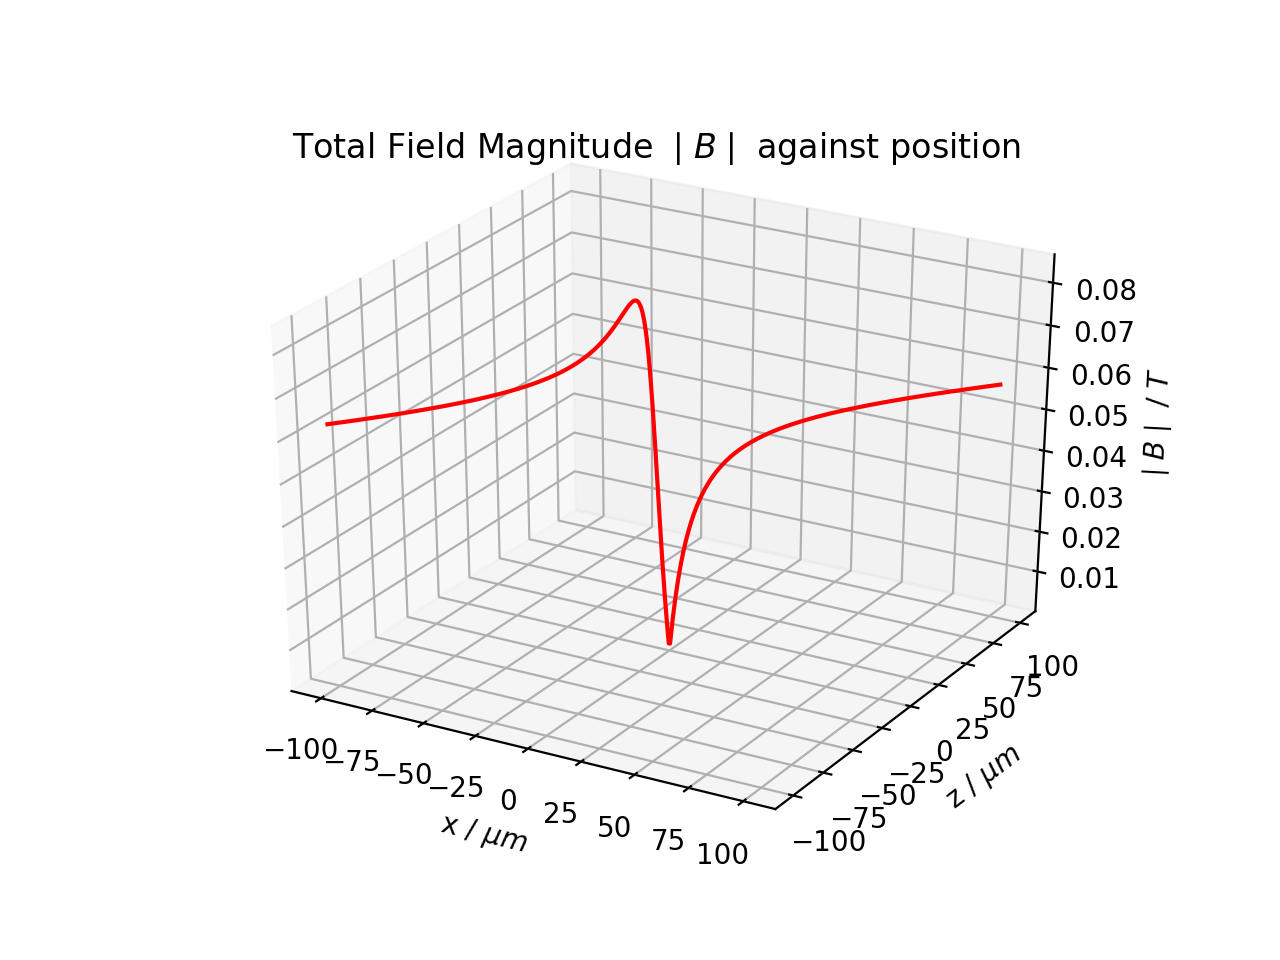

In [167]:
#Bias field in all directions
Bias_x = (mu_0*I_centre)/(2*np.pi*dc)
Bias_y = 0
Bias_z = 0

#Total Bias field
B_bias = [Bias_x, Bias_y, Bias_z]

#initiate total field list
B_tot = []

#loop to calculate components of total field
for i in range(3):
    B_tot.append(np.array(B_wire[i])-B_bias[i])

#total field magnitude
B_mod = [np.sqrt(B_tot[0][i]**2+B_tot[1]**2+B_tot[2][i]**2) for i in range(len(x_array))]

#plot total field magnitude against x and z
plt.figure()
ax = plt.axes(projection="3d")
ax.plot(x_array*1e06,z_array*1e06,B_mod, "r")
ax.set_title("Total Field Magnitude $\mid B \mid$ against position")
ax.set_xlabel("x / $\mu m$")
ax.set_ylabel("z / $\mu m$")
ax.set_zlabel(r"$\mid B \mid $ / $T$")
plt.show()

As can be seen above, the magnitude of the total field is a minimum at the origin and increases with distance. However, we are only interested in the particle movement in the x-axis and at a value $z_{trap} = 0 $ (height at which the magnitude of the total field evaluated at x=0 equals the bias field ).

In the cell below we calculate the magnitude of the total field for $z=0$. 

<IPython.core.display.Javascript object>


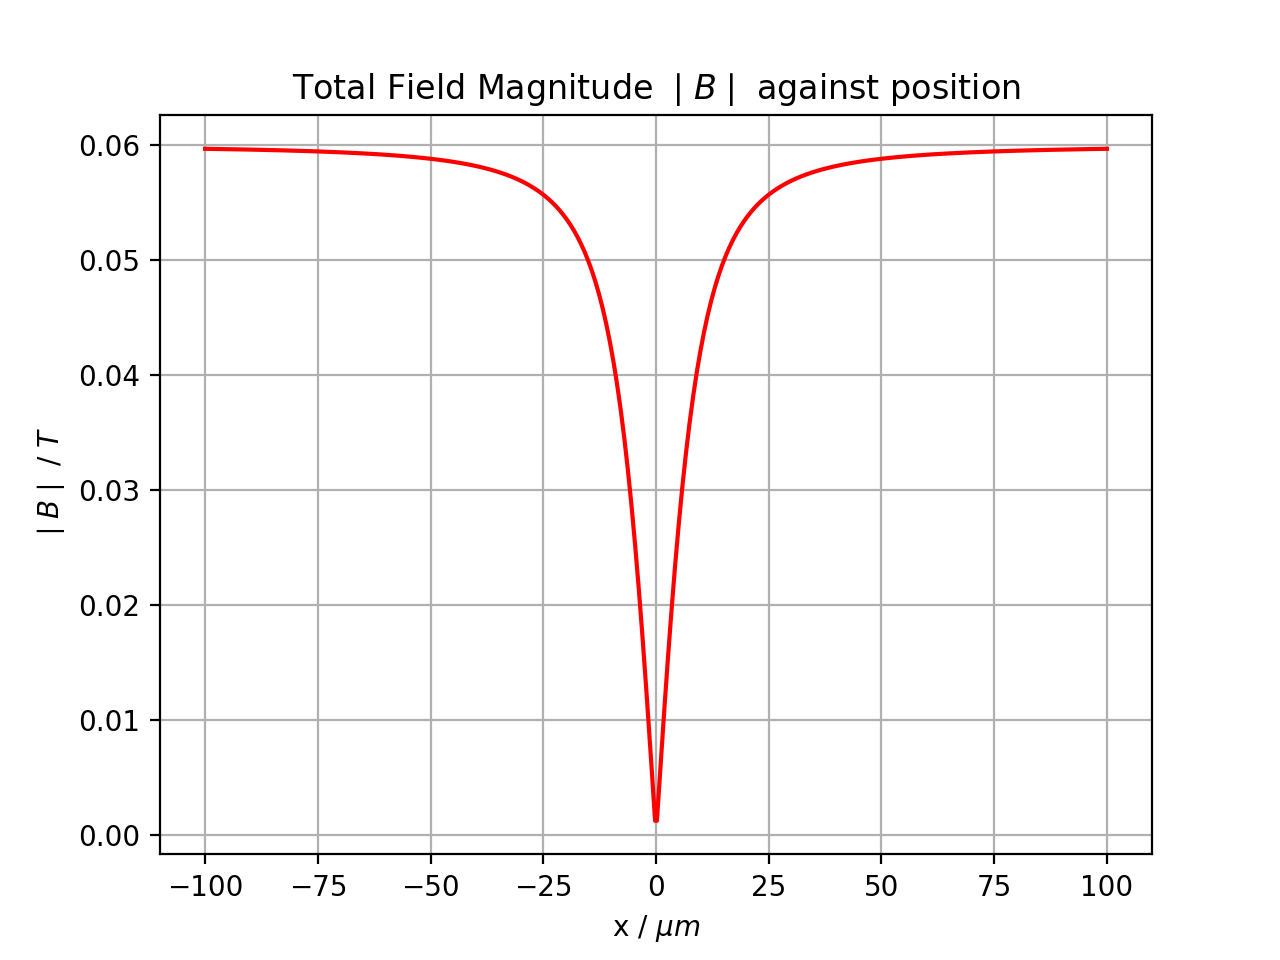

In [168]:
#calculate field components for x values
Bx_trap = [(mu_0*I_centre/((2*np.pi)*(x**2+(dc)**2)))*(dc) for x in x_array]
By_trap = 0
Bz_trap = [(mu_0*I_centre/((2*np.pi)*(x**2+(dc)**2)))*(-x) for x in x_array]

#centre wire field and total field
B_wire_trap = [Bx_trap,By_trap,Bz_trap]
B_tot_trap = [] #initiate total field list

#loop to calculate components of total field
for i in range(3):
    B_tot_trap.append(np.array(B_wire_trap[i])-B_bias[i])

#total field magnitude/modulus
B_mod_trap = [np.sqrt(B_tot_trap[0][i]**2+B_tot_trap[1]**2+B_tot_trap[2][i]**2) for i in range(len(x_array))]

#plot total field magnitude against x
plt.figure()
plt.grid()
plt.plot(x_array*1e06, B_mod_trap, "r") #multiply by a factor of 1e06 to have in units µm
plt.title("Total Field Magnitude $\mid B \mid$ against position")
plt.xlabel("x / $\mu m$")
plt.ylabel(r"$\mid B \mid$ / $T$");

As can be seen, the magnitude of the total magnetic field shows an asymptotic behaviour as $x \to \pm \infty $. Having calculated the values of $\mid B \mid$ for different x values, we can now at last make use of Eq. 2 to derive the equation of motion of our particle moving under the influence of this magnetic field. 

### Deriving the Equation of Motion

In order to derive an equation of motion for our microparticle, we must first know the gradient of the field in the x-direction. The gradient of the field is given by the Taylor expansion of the magnitude of the total field. However, in the plot above it can be seen how the field is approximately linear in x around the origin and therefore we can apply the expansion only to the first order. The final expression for the gradient, $\nabla B$, [3] is the following:

$$ \nabla B = \frac{2\pi Bias_x}{\mu_0 I_{centre}} \tag{7} $$

And the expression for the total field modulus in terms of $x$ would simply be: 

$$ \mid B \mid = B_0 - \nabla B x \tag{8} $$

In the code cell below we calculate the field gradient.

In [158]:
#calculate field gradient 
grad_B = (2*np.pi*Bias_x)/(mu_0*I_centre)

print("The gradient of the field is:\n")
print(grad_B, "T/m")

The gradient of the field is:

99999.99999999999 T/m


Having calculated the gradient of the field, we can now express the potential that the particle is subject to due to the magnetic field as: 

$$ \mathsf{U}_m = -\frac{V(B_0 - \nabla B x)^{2}}{2\mu_0} \left[\chi_{2,\parallel}-\chi_1 \right] \tag{9} $$

where $\nabla B = 100,000 \frac{T}{m} $. 

We can therefore now proceed to deriving the equation of motion of our particle by using the Euler-Lagrange equation: 

$$ \frac{\delta \mathsf{L}}{\delta x}-\frac{d}{d t}\frac{\delta \mathsf{L}}{\delta \dot{x}} = 0 \tag{10} $$

where $\mathsf{L} = \mathsf{T - U_m}$ is the Lagrangian and $\mathsf{T} = \frac{1}{2}m \dot{x}^2$ is the kinetic energy of the particle using the convention that $ \dot{x} = \frac{dx}{dt} $. Including the non-conservative forces that are the viscous drag forces and the Brownian term we get the result that: 

$$ m \ddot{x} =  {\nabla B} \frac{V(\chi_{2,\parallel}-\chi_1)}{\mu_0}\left[{B_0-\nabla B}x\right] - \gamma\dot{x} + \sqrt{2D}W(t)  \tag{11} $$

which, ignoring the inertial terms yields the following finite difference equation: 

$$ x_{i+1} = x_{i} + (B_0-\nabla Bx_i)\left[\frac{{\Delta t\nabla B}V(\chi_{2,\parallel}-\chi_1)}{\gamma\mu_0}\right] + \sqrt{2D\Delta t}w_i \tag{12} $$

where $\Delta t$ is the discrete time step between consecutive particle movements. Moreover, in the case of this simulation we have a boundary value problem with initial condition: 

$$ x(t=0) = 0 $$

In the code cell below we define a function that iteratively solves for the motion of our microparticle using the finite difference equation above: 

In [169]:
def HOPG_guide(t_initial, t_final, dt, initial_condition = [0]): 
    """Simulates the motion of an HOPG microparticle submerged in an aqueous solution
    under the influence of a magnetic field gradient. 
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float/int): discrete time step.
    initial_condition (1D-array): values for initial condition (default=(0)).
    
    Output: 
    x_motion (1D-NumPy array): array of particle position values. 
    """
    N = int((t_final-t_initial)/dt) #number of discrete time steps.
    
    #w_x, w_y, and w_z arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    
    x_motion = [initial_condition[0]] #initialise motion array
    
    #calculate motion in x for N-1 time steps
    for i in range(N-1): 
        x_motion.append(x_motion[i]+(B_0-(grad_B*1e-06)*x_motion[i])*(dt*(grad_B*1e-06)*V*(chi_parr-chi_water))/(gamma*mu_0) + rand_norm_xarray[i])
    
    return np.array(x_motion), rand_norm_xarray

<IPython.core.display.Javascript object>


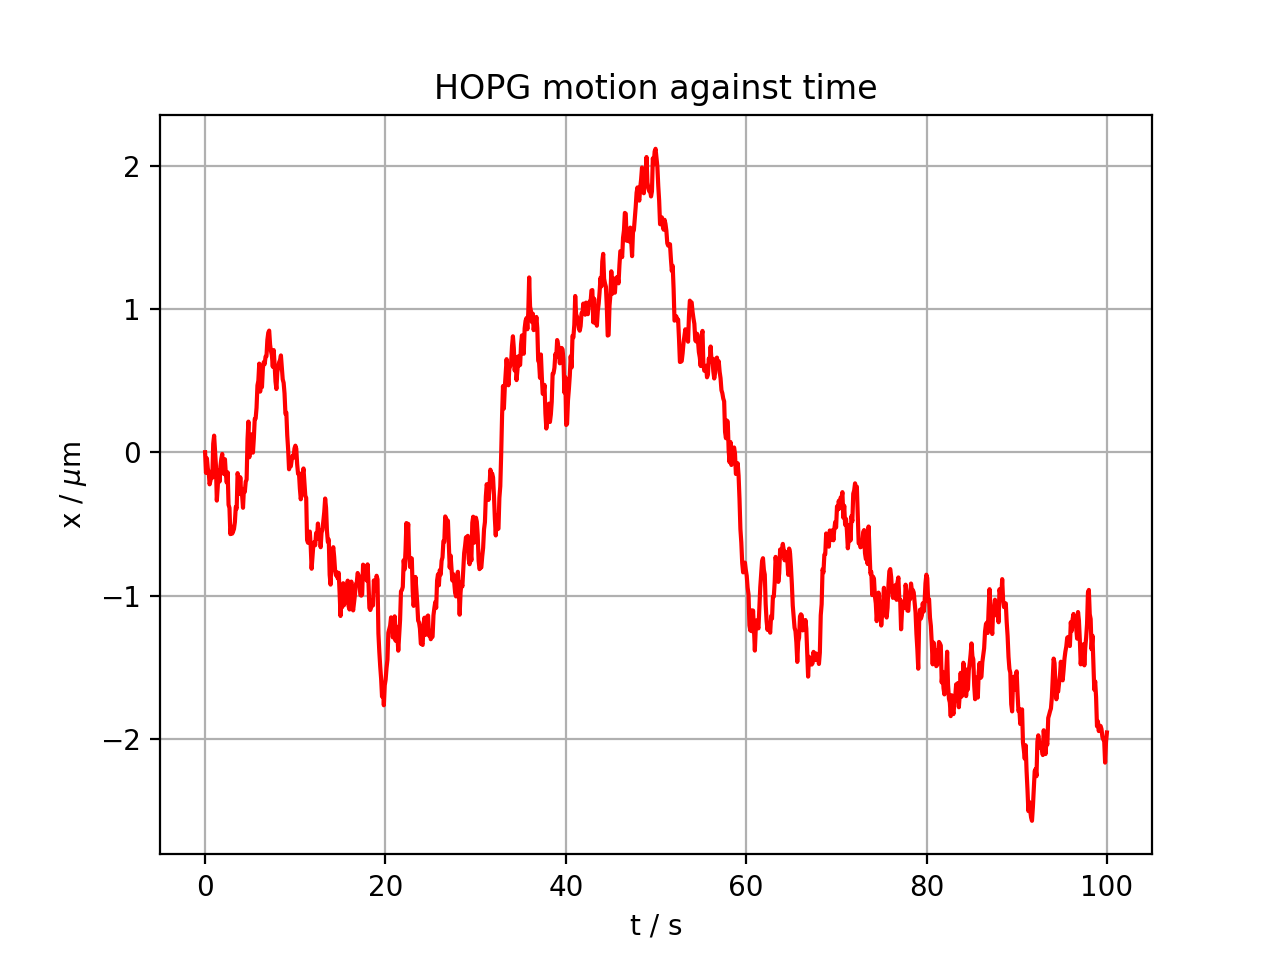

In [173]:
dt = 0.1 #discrete time step in seconds
t_initial = 0 #sec
t_final = 100 #sec

#time array
time_array = np.linspace(t_initial,t_final,int((t_final-t_initial)/dt))

#motion x-array
x_motion, rand_array = HOPG_guide(t_initial, t_final, dt)

plt.figure()
plt.grid()
plt.plot(time_array, x_motion, "r")
plt.title("HOPG motion against time")
plt.xlabel("t / s")
plt.ylabel("x / $\mu$m");

In [137]:
print("grad_B", grad_B)
print("B_0", B_0)
print("V", V)
print("gamma", gamma)
print("mu_0",mu_0)
#print(rand_array)
print(x_motion)

grad_B 99999.99999999999
B_0 1.5
V 1.570796326794897e-16
gamma 8.388052385084748e-08
mu_0 1.2566370614359173e-06
[ 0.          0.07165084  0.06322669  0.10912465  0.00985982  0.01710258
  0.10730551  0.1887132   0.25257681  0.19307774  0.22156241  0.14135818
  0.21169477  0.24013682  0.31288834  0.34414292  0.175596    0.38535135
  0.44626087  0.41036491  0.4824291   0.43053569  0.39614879  0.56006036
  0.66004993  0.88873392  0.73399223  0.81456198  0.79378249  0.88988749
  0.96214191  0.92951845  0.93910531  0.94161874  1.03150413  1.20777022
  1.29163488  1.34079011  1.32446397  1.32631705  1.33257828  1.49957911
  1.45677145  1.34695944  1.26319099  1.28926852  1.33224043  1.25174014
  1.34093779  1.262242    1.38157152  1.42237393  1.53095111  1.43291154
  1.61680315  1.61600667  1.71088508  1.76500193  1.833359    1.88303993
  1.97865238  1.95650677  2.02985387  1.92198836  1.88753472  1.81940248
  1.85298376  1.94855518  1.83875986  1.98667066  1.82228999  1.55044938
  1.5069929

### Bibliography

[1]. J. Nguyen, D. V. Conca, J. Stein, L. Bovo, C. A. Howard, and I. L. Garcia, “Magnetic control of graphitic microparticles in aqueous solutions,” Proceedings of the National Academy of Sciences, vol. 116, no. 7, pp. 2425–2434, 2019.

[2]. I. L. Garcia, “Advances in the design and operation of atom chips,” dissertation, 2008.